# **Titanic: An√°lisis de una tragedia**

*Nicole Lastra Quiroz - Julio 2022*



## I. Objetivo

* Predecir si un pasajero sobrevivi√≥ al hundimiento del Titanic o no, usando los algoritmos de aprendizaje supervisado: Random Forests y AdaBoost.

* Para cada uno en el conjunto de prueba, se debe predecir un valor de 0 o 1 para la variable `survived`.

## II. Breve Contexto

El hundimiento del Titanic es uno de los naufragios m√°s conocidos de la historia.

<img src="https://miro.medium.com/max/1400/1*TD1TlRu96o_gDrM-NiBwpQ.jpeg" style="float:center ; padding:16px"/>

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundi√≥ despu√©s de chocar con un iceberg. Desafortunadamente, no hab√≠a suficientes botes salvavidas para todos a bordo, lo que result√≥ en la muerte de 1502 de los 2.224 pasajeros y la tripulaci√≥n.

Si bien hubo alg√∫n elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas ten√≠an m√°s probabilidades de sobrevivir que otros.

* En este taller, usted deber√° crear un modelo predictivo que responda a la pregunta: "¬øQu√© tipo de personas ten√≠an m√°s probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioecon√≥mica, etc.). Muy importante, deber√° usar exclusivamente los algoritmos de aprendizaje supervisado (Random forests y AdaBoost)

### Descripci√≥n de los datos

Los datos se han dividido en dos grupos:
* conjunto de entrenamiento (train.csv)
* conjunto de prueba (test.csv)

El conjunto de entrenamientodebe usarse para crear sus modelos de aprendizaje autom√°tico.Para el conjunto de entrenamiento, proporcionamos el resultado (tambi√©n conocido como la ‚Äúground truth") para cada pasajero.

Su modelo se basar√° en "caracter√≠sticas" como el g√©nero y la clase de los pasajeros. Tambi√©n puede utilizar la ingenier√≠a de funciones para crear nuevas funciones.
El conjunto de prueba debe usarse para ver qu√© tan bien se desempe√±a su modelo con datos invisibles. Para el equipo de prueba, no proporcionamos la ‚Äúground truth‚Äù para cada pasajero. Es su trabajo predecir estos resultados. Para cada pasajero en el conjunto de prueba, use el modelo que entren√≥ para predecir si sobrevivieron o no al hundimiento del Titanic.

#### Diccionario de datos

* Survived -> Supervivencia:  0 = No, 1 = S√≠
* Pclass -> Clase del boleto: 1 = 1¬∞ clase, 2 = 2¬∞ clase, 3 = 3¬∞ clase
* Sex -> Sexo: Male, Female
* Age -> Edad en a√±os
* Sibsp -> N√∫mero de hermanos / c√≥nyuges a bordo del Titanic
* Parch -> N√∫mero de padres / hijos a bordo del Titanic
* Ticket -> Numero de ticket
* Fare -> Tarifa de pasajero
* Cabin -> N√∫mero de cabina
* Embarked -> Puerto de embarque : C = Cherburgo, Q = Queenstown, S = Southampton

#### Notas

_pclass_: un proxy para el estatus socioecon√≥mico (SES) 
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

_Age_ -> la edad es fraccionaria si es menor que 1. Si se estima la edad, estar√° en la forma de xx.5

_sibsp_ -> el conjunto de datos define las relaciones familiares de esta manera:
* Sibling = hermano, hermana, hermanastro, hermanastra
* Spouse = esposo, esposa (se ignoraron las amantes y los novios)

_parch_ -> El conjunto de datos define las relaciones familiares de esta manera:
* Parent = madre, padre
* Child = hija, hijo, hijastra, hijastro
* Algunos ni√±os viajaban solo con una ni√±era, por lo tanto, parch = 0 para ellos


## III. An√°lisis

### Importaci√≥n de librer√≠as

In [1]:
# Para tratamiento de los datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm
import multiprocessing

# Para gr√°ficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns


#Para preprocesado y modelado
# ------------------------------------------------------------------------------
from pandas.core.series import Series
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Para configuraci√≥n warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importaci√≥n de datos

Comenzamos por montar el la informaci√≥n referida a Drive de Google, de modo que no tenga problemas para leer y extraer la informaci√≥n.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Una vez realizado este procedimiento, procedemos a Importar los datos como tal, copiando el directorio en el que se encuentran, en este caso est√°n dentro de la carpeta _"Colab Notebooks"_ (carpeta de guardado por defecto de proyectos de Colab).


- _**Nota:**_ En caso de estar corriendo este trabajo directamente desde el archivo _".ipynb"_ o desde una copia creada en un Colab propio, recordar incluir los archivos de los datos, en la misma carpeta del respectivo Drive, de modo que no ocurran problemas al momento de la lectura. Estos archivos _".csv"_ est√°n incluidos en el mismo _".zip"_ del _".ipynb"_ (para cualquier consulta, dirigirse al mail _nicole.lastra.quiroz@gmail.com_).

In [3]:
# Importaci√≥n de datos de entrenamiento y prueba, respectivamente
# ------------------------------------------------------------------------------
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

### Visualizaci√≥n de datos

Para efectos de orden, se separar√°n los procesos relacionados al set de datos de entrenamiento y de prueba.


#### Set de datos de entrenamiento

Comenzaremos con una visualizaci√≥n simple de los datos como tabla, para luego revisar la cantidad de datos v√°lidos y as√≠ mismo los ausentes, los tipos de datos presentes por columnas, para finalmente pasar a un an√°lisis estad√≠stico simple, de las columnas num√©ricas (m√≠nimos, m√°ximos, cuartiles, media, moda, entre otros).

In [4]:
# Visualizaci√≥n de las 5 primeras filas del set de datos de entrenamiento
# ------------------------------------------------------------------------------
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# Informaci√≥n general de los datos de entrenamiento
# ------------------------------------------------------------------------------
train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Informaci√≥n estad√≠stica del set de datos de entrenamiento
# ------------------------------------------------------------------------------
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Hallazgos generales en la visualizaci√≥n de los datos de entrenamiento:

* El data set de entrenamiento tiene 891 filas y 12 columnas.
* La columna _"Age"_ presenta 177 datos NaN, equivalente a un 19,87%.
* La columna _"Cabin"_ tiene menos del 23% de datos v√°lidos.
* La columna _"Embarked"_ presenta 2 valores NaN.
* Existen 5 columnas con datos de categor√≠a "object".

#### Set de datos de prueba

Procedemos con las mismas visualizaciones para el set de prueba.

In [7]:
# Visualizaci√≥n de las 5 primeras filas del set de datos de prueba
# ------------------------------------------------------------------------------
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
# Informaci√≥n general del set de datos de prueba
# ------------------------------------------------------------------------------
test_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# Informaci√≥n estad√≠stica del set de datos de prueba
# ------------------------------------------------------------------------------
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

Hallazgos generales en la visualizaci√≥n de los datos de prueba:

* El data set de prueba tiene 418 filas y 11 columnas.
* La columna _"Age"_ presenta 86 datos NaN, equivalente a un 20,57%.
* La columna _"Fare"_ presenta un √∫nico valor NaN.
* La columna _"Cabin"_ tiene menos del 22% de datos v√°lidos.
* Existen 5 columnas con datos de categor√≠a "object".

#### Gr√°ficas relevantes

Como en todo proceso de estudio, las visualizaciones gr√°ficas pueden aportar mucha informaci√≥n b√°sica, por lo que revisaremos algunas que pueden presentar informaci√≥n interesante, en etapas tempranas del estudio.

Se considerar√° √∫nicamente el set de datos de entrenamiento para estas, ya que contiene la principal columna de inter√©s "Survived", para comparativas y cruce de informaci√≥n.

##### Gr√°ficos de barras

1) Supervivencia de pasajeros:

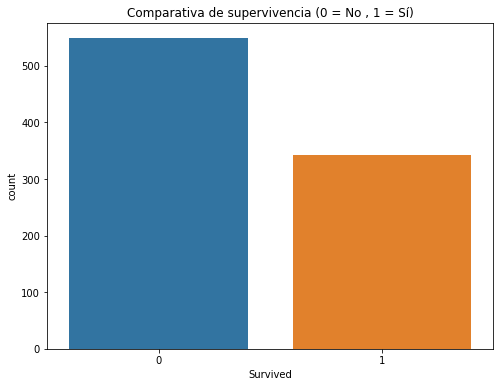

N√∫mero total de muertos : 549
N√∫mero total de sobrevivientes : 342


In [10]:
# Gr√°fico de barras dada la columna Survived en el set de entrenamiento
# ------------------------------------------------------------------------------
fig , ax = plt.subplots(figsize=(8,6))

sns.countplot(x    = "Survived", 
              data = train_data
              )

plt.title("Comparativa de supervivencia (0 = No , 1 = S√≠)")
plt.show()

s0=len(train_data[train_data['Survived']==0])
s1=len(train_data[train_data['Survived']==1])

# Mostrar el numero total de muertos y sobrevivientes
# ------------------------------------------------------------------------------
print("N√∫mero total de muertos :" , s0)
print("N√∫mero total de sobrevivientes :", s1)

Hallazgos y deducciones: 
- En total, un 38.38% de personas abordo del Titanic sobrevive, mientras que un 61.61% de ellos muere. 

2) Supervivencia de pasajeros seg√∫n sexo registrado:

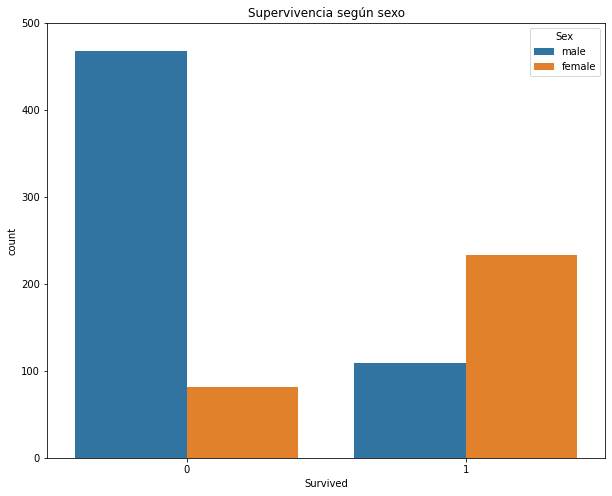

In [11]:
# Gr√°fico de barras segun "Sex" dado "Survived"
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(x    = "Survived", 
              data = train_data, 
              hue  = "Sex"
              )
ax.set_ylim(0,500)

plt.title("Supervivencia seg√∫n sexo")
plt.show()

Hallazgos y deducciones: 
- Murieron m√°s hombres que mujeres
- Las mujeres ten√≠an una menor probabilidad de morir (esto da para un an√°lisis filosofo-socioantropol√≥gico respecto al machismo de la √©poca y el comportamiento de la sociedad, pero eso se escapa de los alcances de este trabajo)

3) Supervivencia de pasajeros seg√∫n la clase del ticket adquirido:

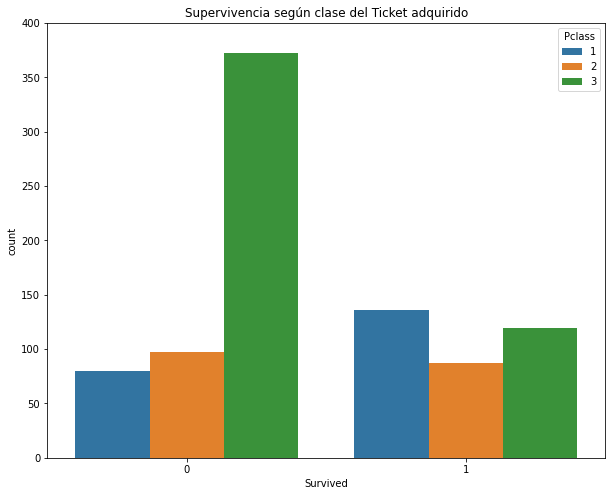

In [12]:
# Gr√°fico de barras de "Pclass" dada la columna "Suvived"
# ------------------------------------------------------------------------------
fig, ax=plt.subplots(figsize=(10,8))
sns.countplot(x    = "Survived", 
              data = train_data, 
              hue  = "Pclass")
ax.set_ylim(0,400)
plt.title("Supervivencia seg√∫n clase del Ticket adquirido")
plt.show()


Hallazgos y deducciones: 
- Los de la 3¬∞ clase ten√≠an mayor probabilidad de morir.
- La √∫nica clase en donde se ve una mayor probabilidad de vivir, versus a morir, es la 1¬∞.
- La 2¬∞ clase tiene porcentajes de sobrevida versus muerte, m√°s equilibrados que las otras categor√≠as.

##### Correlaciones y Mapa de Calor

In [13]:
# Divisi√≥n de variables num√©ricas
# ------------------------------------------------------------------------------
num = ["Age","SibSp","Parch","Fare"]

# Nuevo data frame con variables num√©ricas
# ------------------------------------------------------------------------------
corr_df = train_data[num]

# Correlaci√≥n por m√©todo Pearson
# ------------------------------------------------------------------------------
cor     = corr_df.corr(method='pearson')
print(cor)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


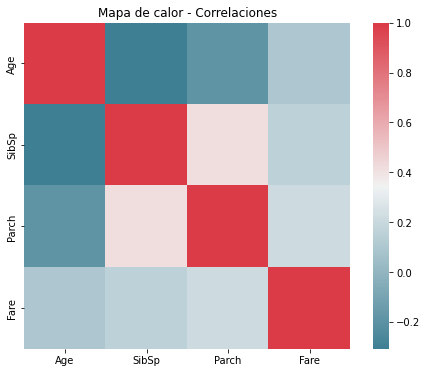

In [14]:
# Mapa de Calor para datos num√©ricos
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Mapa de calor - Correlaciones")

sns.heatmap(cor, 
            mask   = np.zeros_like(cor, dtype=np.bool), 
            cmap   = sns.diverging_palette(220, 10, as_cmap=True),
            square = True, 
            ax     = ax
            )
plt.show()

Hallazgos y deducciones: 
- A simple vista, no existe una fuerte correlaci√≥n entre variables 
- La mayor correlaci√≥n se aprecia entre las variables relativas a la columna "SibSp" y "Parch", y no es del todo extra√±o, ya que ambas tienen que ver con familiares.

### Limpieza de datos



#### Datos de entrenamiento

Considerando la informaci√≥n encontrada en el proceso anterior, se puede afirmar que la columna "Cabin" posee menos del 23% de datos v√°lidos, lo que implica una ausencia de informaci√≥n cercana al 80%. En este caso procederemos a eliminar la columna, tal como sugiere hacer el profesor Balaraman Ravindran, actual directos del the Robert Bosch Centre for Data Science and Artificial Intelligence (RBC-DSAI), en los casos que se presentan ausencias de datos cercanas al 80%. Es preciso declarar que la columna "Cabin" podr√≠a habernos dado informaci√≥n relevante para el estudio, sin embargo al mostrar tal escacez de datos, su aporte se hace irrelevante.

Adem√°s, para efectos de estudio, las columnas relacionadas a "etiquetas" no aportan informaci√≥n relevante (como son las columnas "PassengerId", "Name" y "Ticket"), por lo que procederemos a eliminarlas.

In [15]:
# Eliminaci√≥n de columnas
# ------------------------------------------------------------------------------
train_d = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

# Informaci√≥n general
# ------------------------------------------------------------------------------
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Ahora procederemos con el llenado de las columnas que tienen valores ausentes, como son "Age" y "Embarked".

En el caso de "Age", se opta por reemplazar los 177 datos por la media de la variable, es decir 29 a√±os (aproximadamente la media es de 29,69 a√±os, pero el set de datos s√≥lo asign√≥ valores enteros a las edades sobre el a√±o, y pensando que nuestro modelo de medici√≥n de edad es a a√±o cumplido, las personas con 29,69 a√±os, a√∫n tienen 29 a√±os).

In [16]:
# Llenado de columna "Age"
# ------------------------------------------------------------------------------
media_train = 29
train_d["Age"] = train_d["Age"].fillna(media_train)
train_d.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

En el caso de "Embarked", s√≥lo son 2 valores ausentes, que corresponden al tipo "object", por lo que se opta por reeemplazar con la moda.

In [17]:
# Moda de la columna "Embarked"
# ------------------------------------------------------------------------------
moda_train = train_d["Embarked"].mode()
print(moda_train)

0    S
dtype: object


In [18]:
# Llenado de la columna "Embarked" 
# ------------------------------------------------------------------------------
train_d["Embarked"] = train_d["Embarked"].fillna("S")
train_d.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Habiendo solucionado el llenado de las columnas con valores NaN, corresponde solucionar la problem√°tica respecto a columnas con valores del tipo "object", por lo que realizaremos una recodificaci√≥n de los datos presentes en ellas.

En el caso de la columna "Sex", los valores corrresponden a "female" y "male", los cuales, ahora ser√°n respectivamente "0" y "1". Esto quiere decir que la descripci√≥n general quedar√≠a como:

* Sex -> Sexo: Male = 1 , Female = 0

In [19]:
# Re-codificaci√≥n de la columna "Sex"
# ------------------------------------------------------------------------------
train_d["Sex"].replace(["female", "male"],[0, 1], inplace = True)
train_d.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

En el caso de la columna "Embarked"

* Embarked -> Puerto de embarque : 0 = Cherburgo, 1 = Queenstown, 2 = Southampton

In [20]:
# Re-codificaci√≥n de la columna "Embarked"
# ------------------------------------------------------------------------------
train_d["Embarked"].replace(["C", "Q", "S"],[0, 1, 2], inplace = True)
train_d.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

Ahora, el set de datos correspondiente al entrenamiento se encuentra en condiciones √≥ptimas para ser trabajado. 

Se corrobora aplicando nuevamente la funci√≥n `info()`, y verificando en su resumen la ausencia de valores NaN y la ausencia de variables tipo "object".

In [21]:
# Informaci√≥n general
# ------------------------------------------------------------------------------
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


#### Datos de prueba

En el caso de los datos de prueba, "Cabin" posee menos del 22% de datos v√°lidos, por lo que tambi√©n procederemos a eliminarla por los criterios ya mencionados para los datos de entrenamiento, en donde se repite la situaci√≥n. 

En el caso de las columnas "PassengerId", "Name" y "Ticket", sucede lo mismo declarado anteriormente, no son relevantes para efectos de este estudio.

In [22]:
# Eliminaci√≥n de columnas
# ------------------------------------------------------------------------------
test_d = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Informaci√≥n general
# ------------------------------------------------------------------------------
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


En este caso se debe proceder con el llenado de las columnas que tienen valores ausentes, como son "Age" y "Fare".

En el caso de "Age", nuevamente se opta por reemplazar los 86 datos por la media de la variable, en este caso 30 a√±os (si bien es del orden de los 30,27 a√±os, se justifica tal como en el caso anterior por el criterio usado en el data set y as√≠ mismo el criterio general de a√±os cumplidos).

In [23]:
# Llenado de columna "Age"
# ------------------------------------------------------------------------------
media_test = 29
test_d["Age"] = test_d["Age"].fillna(media_test)
test_d.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

En el caso de "Fare", s√≥lo es 1 valor ausente, que corresponden al tipo "float64", por lo que se opta por reeemplazar con la media.

In [24]:
# Moda de la columna "Fare"
# ------------------------------------------------------------------------------
media_test = test_d["Fare"].mean()
print(media_test)

# Llenado de la columna "Fare"
# ------------------------------------------------------------------------------
test_d["Fare"] = test_d["Fare"].fillna(media_test)
test_d.head()

35.627188489208635


Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

Tal como en el caso de los datos de prueba, procedemos con la transformaci√≥n de las columnas "object" a "int", siguiendo el mismo procedimiento ya descrito.

In [25]:
# Re-codificaci√≥n de las columnas "Sex" y "Embarked"
# ------------------------------------------------------------------------------
test_d["Sex"].replace(["female", "male"],[0, 1], inplace = True)
test_d["Embarked"].replace(["C", "Q", "S"],[0, 1, 2], inplace = True)
test_d.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2

Ahora, el set de datos de prueba se encuentra en condiciones √≥ptimas para ser trabajado. 

Se corrobora aplicando nuevamente la funci√≥n `info()`, y verificando en su resumen la ausencia de valores NaN y la ausencia de variables tipo "object".

In [26]:
# Informaci√≥n general
# ------------------------------------------------------------------------------
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


### Random Forest

Comenzamos con la definici√≥n de los grupos de datos de entrenamiento y prueba, que ya viene entregada por defecto, teniendo el cuidado de centrar el proceso en la variable de inter√©s, en este caso "Survived", quien nos acusa la sobrevivencia de las personas abordo del Titanic.

In [27]:
# Divisi√≥n de los datos en train y test
# ------------------------------------------------------------------------------
train_df = train_d.drop(columns=["Survived"], axis=1)
y = train_d["Survived"]

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.3, random_state = 123)



#### Random Forest utilizando Grid Search basado en out-of-bag score

El proceso del random forest se realizar√°, con ayuda del Grid Search, bajo un `max_features` de 3, 5 y 7, es decir, se seleccionar√° un maximo de 3, 5 y 7 features del set de datos para generar los √°rboles, mientras que la profundidad m√°xima de ellos (`max_depth`), se establecer√° como "None", 5 y 10. 

En el caso de los criterios, se comparar√°n `gini` y `entropy` (pese a que por teor√≠a y las condiciones del set, se podr√≠a presumir que el mejor resultado ser√° seg√∫n el criterio `entropy`).

El n√∫mero de estimadores viene usualmente por defecto en 100, pero en esta ocasi√≥n se modificar√° a 150.

In [28]:
# Grid de hiperpar√°metros evaluados de acuerdo a condiciones preestablecidas
# ------------------------------------------------------------------------------
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [3, 5, 7],
                 'max_depth'   : [None, 5, 10],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinaci√≥n de hiperpar√°metros
# ------------------------------------------------------------------------------
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
    )
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimato

In [29]:
# Visualizaci√≥n de Resultados
# ------------------------------------------------------------------------------

resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head()

oob_accuracy criterion  max_depth  max_features  n_estimators
12      0.841091   entropy        5.0             3           150
13      0.834671   entropy        5.0             5           150
3       0.834671      gini        5.0             3           150
5       0.831461      gini        5.0             7           150
4       0.829856      gini        5.0             5           150

Bajo esta modalidad, el resultado con mejor precisi√≥n se da bajo el criterio `entropy` a una profundidad m√°xima de 10, considerando 7 features, alcanzando una precisi√≥n del 84.11%  (el mejor de los hiperpar√°metros encontrados `oob-accuracy` posee una precisi√≥n de 0.84109).

#### Versi√≥n Paralelizada

Repetiremos la acci√≥n, esta vez por un proceso paralelizado, estableciendo los mismos `max_features` y `max_depth` que en el caso anterior.

In [30]:
# Loop para ajustar un modelo con cada combinaci√≥n de hiperpar√°metros
# ------------------------------------------------------------------------------

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [3, 5, 7],
                 'max_depth'   : [None, 5, 10],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop paralelizado para ajustar un modelo con cada combinaci√≥n de hiperpar√°metros
# ------------------------------------------------------------------------------

def eval_oob_error(X, y, modelo, params, verbose = True):
    """
    Funci√≥n para entrenar un modelo utilizando unos par√°metros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        bootstrap    = True,
        random_state = 123,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_accuracy': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes = n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(X_train, y_train, RandomForestClassifier(), params) for params in param_grid]
             )


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'n_estimators': 150} ‚úì
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimato

In [31]:
# Visualizaci√≥n de Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis = 1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_accuracy', ascending = False)
resultados.head()

oob_accuracy criterion  max_depth  max_features  n_estimators
12      0.841091   entropy        5.0             3           150
13      0.834671   entropy        5.0             5           150
3       0.834671      gini        5.0             3           150
5       0.831461      gini        5.0             7           150
4       0.829856      gini        5.0             5           150

En la versi√≥n paralelizada, como era de esperar, el resultado es el mismo obtenido en el caso anterior. Es decir, el mejor resultado se obtiene bajo el criterio `entropy` a una profundidad m√°xima de 10, considerando 7 features, alcanzando una precisi√≥n del 84.11%  (el mejor de los hiperpar√°metros encontrados `oob-accuracy` posee una precisi√≥n de 0.84109).



#### Random Forest con Grid Search y validaci√≥n cruzada


Esta vez realizaremos el Random Forest tambi√©n utilizando Grid Search, con el agregado de validaci√≥n cruzada. 

Para efectos comparativos, se establecen los mismos `max_features` y `max_depth` que en los casos anteriores.

In [32]:
# Grid de hiperpar√°metros evaluados
# ------------------------------------------------------------------------------
param_grid = {'n_estimators': [150],
              'max_features': [3, 5, 7],
              'max_depth'   : [None, 5, 10],
              'criterion'   : ['gini', 'entropy']
             }

# B√∫squeda por grid search con validaci√≥n cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits     = 5 , 
                                   n_repeats    = 3, 
                                   random_state = 123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)



GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'max_features': [3, 5, 7],
                         'n_estimators': [150]},
             return_train_score=True, scoring='accuracy')

In [33]:
# Visualizaci√≥n de Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

param_criterion param_max_depth param_max_features param_n_estimators  \
13         entropy               5                  5                150   
4             gini               5                  5                150   
12         entropy               5                  3                150   
3             gini               5                  3                150   
14         entropy               5                  7                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
13         0.825583        0.028762          0.867309         0.008807  
4          0.821295        0.027569          0.874397         0.009896  
12         0.820735        0.024105          0.860618         0.006711  
3          0.820211        0.026764          0.866637         0.005999  
14         0.819157        0.028870          0.871055         0.008093

Este m√©todo arroja un 82,55% en el `mean_test_score`, a una profundidad m√°xima de 10, considerando 3 features.

El hecho de que el set de entrenamiento arroje 86,73% en el `mean_train_score` habla de que no se ha producido un sobre entrenamiento del modelo, lo que es muy bueno.

Ya identificados los mejores hiperpar√°metros, se reentrena el modelo con los argumentos respectivos.

Observar que como establecimos que `refit = True` en el `GridSearchCV()`, el nuevo entrenamiento se realiza de forma autom√°tica y se guarda bajo `.best_estimator` .

In [34]:
modelo_final = grid.best_estimator_

#### Predicci√≥n y evaluaci√≥n del modelo final

En este paso paso utilizaremos el set de datos de prueba, para evaluar la capacidad de predicci√≥n del modelo final.

In [35]:
# Error de test del modelo final
# ------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)
predicciones[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [36]:
# Matriz de confusi√≥n
# ------------------------------------------------------------------------------
mat_confusion = confusion_matrix(
                    y_true = y_test,
                    y_pred = predicciones
                    )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusi√≥n")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusi√≥n
-------------------
[[154  16]
 [ 30  68]]

El accuracy de test es: 82.83582089552239 %


In [37]:
# Reporte de clasificaci√≥n
# ------------------------------------------------------------------------------
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       170
           1       0.81      0.69      0.75        98

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



Luego de la optimizaci√≥n de los hiperparametros se consigui√≥ un accuracy del 82,84%.

#### Predicci√≥n de Probabilidades

S√≥lo para efector educativos, vamos a predecir y visualizar las probabilidades de ocurrencia, de a cuerdo al modelo final, de 7 casos posibles.

In [38]:
# Predicci√≥n de probabilidades
# ------------------------------------------------------------------------------
predicciones = modelo_final.predict_proba(X = X_test)
predicciones[:7, :]

array([[0.35280946, 0.64719054],
       [0.85409858, 0.14590142],
       [0.58655111, 0.41344889],
       [0.79157817, 0.20842183],
       [0.81136977, 0.18863023],
       [0.88776854, 0.11223146],
       [0.1312467 , 0.8687533 ]])

In [39]:
# Clasificaci√≥n empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['Predicci√≥n de sobrevida'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(7)

0         1  Predicci√≥n de sobrevida
0  0.352809  0.647191                        1
1  0.854099  0.145901                        0
2  0.586551  0.413449                        0
3  0.791578  0.208422                        0
4  0.811370  0.188630                        0
5  0.887769  0.112231                        0
6  0.131247  0.868753                        1

Esto se traduce en, por ejemplo para el primer caso, la visualizaci√≥n de probabilidades de morir o vivir (aproximados del 35,28% y 64,72% respectivamente). De acuerdo a los resultados, este primer caso lograr√≠a sobrevivir a la tragedia.

Lo mismo se repite para los siguientes 6 casos enlistados, en donde vemos que s√≥lo el √∫ltimo caso logra sobrevivir y con una probabilidad mayor a la del primer caso estudiado.

Notar que estas probabilidades son por caso particular, no se repiten de forma constante para todos los casos a los que estudiemos su supervivencia, por esto es tan importante el revisar la predicci√≥n de probabilidades y saber con qu√© porcentaje d probabilidad se est√° tomando la decici√≥n final sobre si vive o muere.

#### Importancia de predictores



Realizaremos una breve revisi√≥n a la importancia de los predictores seg√∫n pureza de nodos y por permutaciones realizadas.

##### Por pureza de nodos

In [40]:
# Visualizaci√≥n de importancia de predictores por pureza de nodos
# ------------------------------------------------------------------------------
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
1       Sex     0.415626
5      Fare     0.175574
2       Age     0.173785
0    Pclass     0.151985
3     SibSp     0.052254
6  Embarked     0.018212
4     Parch     0.012564

Esto guarda relaci√≥n con algo que se hab√≠a observado en etapas iniciales de este an√°lisis. El predictor de supervivencia tiene una marcada tendencia seg√∫n la variable `Sex`, ya que como recordaremos, las mujeres ten√≠an una sobrevida mucho m√°s alta y marcada que los hombres.

##### Por Permutaci√≥n


In [41]:
# Visualizaci√≥n de importancia de predictores por permutaciones 
# ------------------------------------------------------------------------------
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviaci√≥n) en un dataframe
# ------------------------------------------------------------------------------
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std   feature
1          0.242357         0.016014       Sex
0          0.122737         0.010276    Pclass
2          0.089255         0.011168       Age
5          0.045229         0.010303      Fare
3          0.018836         0.003647     SibSp
6          0.006384         0.001889  Embarked
4          0.002139         0.001351     Parch

En este caso podemos adem√°s, visualizar la importancia de los predictores con el aumento de su error respectivo a medida que se realizan las permutaciones, tal como se muestra a continuaci√≥n.

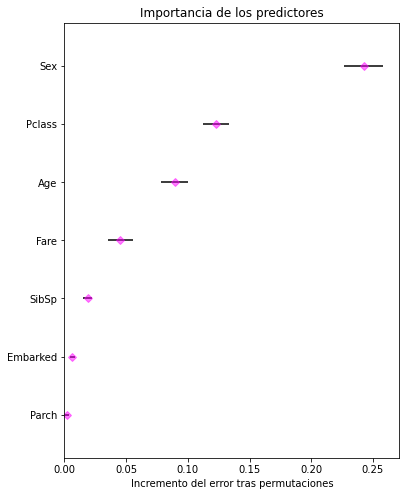

In [42]:
# Gr√°fica de importancia de predictores
# ------------------------------------------------------------------------------
fig, ax        = plt.subplots(figsize=(6, 8))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)

ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr  = df_importancia['importances_std'],
    align = 'center',
    alpha = 0
)

ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker    = "D",
    linestyle = "",
    alpha     = 1.5,
    color     = "magenta"
)

ax.set_title('Importancia de los predictores')
ax.set_xlabel('Incremento del error tras permutaciones');

Podemos apreciar que la variable `Sex` presenta un mayor incremento del error tras permutaciones, seguida por `Fare` y `Age`.

Recordemos que `Pclass` es el segundo predictor en importancia, pero observamos en la gr√°fica que se mantiene con un menor aumento de error, por ejemplo, que la variable `Sex` (quien se encuentra en primer lugar de importancia de los predictores).


Con este √∫ltimo paso, damos por terminado el an√°lisis de los datos por Random Forest.

### AdaBoost

En esta secci√≥n, realizaremos un an√°lisis de los datos con AdaBoost, espec√≠ficamente con ayuda de `GradientBoostingRegressor`.

Seguiremos casi la misma estructura que con Random Forest, por lo que comenzaremos con la divisi√≥n de los datos, luego con la creaci√≥n y entrenamiento del modelo, para luego estudiar sus niveles de predicci√≥n, as√≠ como diferentes formas de trabajar con ayuda de `GridSearch` (notar que iniciallmente utilizaremos `n_estimators` = 150, para seguir con la misma din√°mica utilizada en el caso de Random Forest). 

#### Divisi√≥n de los datos

In [43]:
# Divisi√≥n de los datos en train y test
# ------------------------------------------------------------------------------
train_df = train_d.drop(columns = "Survived", axis = 1)
y = train_d["Survived"]

X_train, X_test, y_train, y_test = train_test_split(train_df, y, random_state = 123)

#### Creaci√≥n y entrenamiento del modelo

In [44]:
# Creaci√≥n del modelo
# ------------------------------------------------------------------------------
modelo = GradientBoostingClassifier(
            n_estimators = 150,
            max_features = 'auto',
            random_state = 123
         )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=150,
                           random_state=123)

Una informaci√≥n relevante para comparar modelos mas adelante, es que los valores por defecto de los siguientes hiperpar√°metros que no est√°n definidos aqu√≠, son:
- `max_depth` = 3
- `learning_rate` = 0.1

#### Predicci√≥n y evaluaci√≥n del modelo creado

In [45]:
# Accuracy de test del modelo inicial
# ------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
            )

print(f"La precisi√≥n del test es: {accuracy}")

La precisi√≥n del test es: 0.8430493273542601


Este primer modelo entrega una precisi√≥n del 84.30%, pero utiliza varios hyperpar√°metros por defecto, por lo que ahora revisaremos cuales son los valores √≥ptimos de algunos de esos hyperpar√°metros (`n_sestimators` y `learning_rate`).

#### N√∫mero de arboles

Como al inicio de un an√°lisis no se sabe con exactitud cuales son los hiperpar√°metros m√°s adecuados, es que se hace necesario revisar cu√°l es el valor optimo de cada uno de ellos, en este caso primero revisaremos el n√∫mero √≥ptimo de √°rboles.


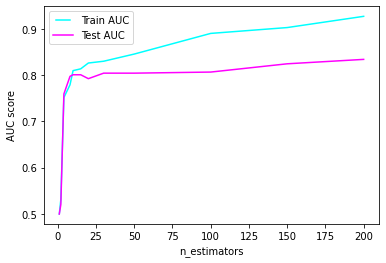

In [46]:
n_estimators = [1, 2, 4, 8, 10, 15, 20, 30, 50, 100, 150, 200]

train_results = []
test_results = []

for estimator in n_estimators:

   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   
   train_results.append(roc_auc)
   
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   
   test_results.append(roc_auc)
   

line1, = plt.plot(n_estimators, train_results, "cyan", label = "Train AUC")
line2, = plt.plot(n_estimators, test_results, "magenta", label = "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Desde la gr√°fica podr√≠amos inferir que los candidatos a valores √≥ptimos de de √°rboles podr√≠an ser 20, 30 y considerando un a ligera estabilizaci√≥n en el set de prueba, pero una mejora de valores para el set de entrenamiento, 50.

No realizaremos mayores estudios ya que generaremos un modelo √≥ptimo para los diversos hyperpar√°metros con ayuda de un grid search y validaci√≥n cruzada, para luego comprar con los supuestos encontrados.





#### Learning rate

Este es uno de los hiperpar√°metros m√°s importantes, junto con el n√∫mero de √°rboles. 
A continuaci√≥n revisaremos dos versiones para decidir cu√°l es el √≥ptimo `learning_rate` para nuestro modelo.

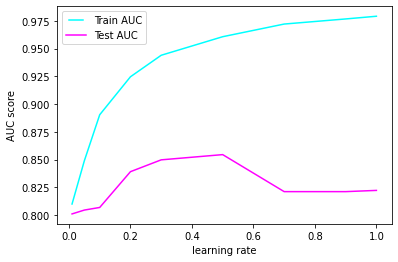

In [47]:
# Estudio Learning rate - forma A
# ------------------------------------------------------------------------------
learning_rates = [1, 0.9, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01]
train_results  = []
test_results   = []

for eta in learning_rates:

   model = GradientBoostingClassifier(learning_rate = eta)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)

   train_results.append(roc_auc)

   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   
   test_results.append(roc_auc)

# Gr√°fica de resultados
# ------------------------------------------------------------------------------

line1, = plt.plot(learning_rates, train_results, "cyan", label="Train AUC")
line2, = plt.plot(learning_rates, test_results, "magenta", label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

En este primer estudio, usamos los datos por defecto para evaluar s√≥lo diferentes valores para `learning_rate` (recordar que el `max_depth` por defecto es 3 y el `n_estimators` es de 100). 

En la gr√°fica llaman la atenci√≥n dos puntos, `leaning_rate` igual a 0.1, e igual a 0.5, seg√∫n se desee trabajar con mayor o menor riesgo de over fitting se podr√≠a seleccionar uno o el otro, ya que en el caso del 0.5 vemos que que el AUC score del set de entrenamiento supera ligeramente el 0.95, mientras que al seleccionar el 0.1 ser√≠a tomar un camino m√°s seguro. 

Para efectos de decisi√≥n, realizaremos otro estudio modificando el `n_estimators` por un valor de arboles m√°s acotado, espec√≠ficamente 20, que fue el `n_estimators` utilizado por modelo con grid search y validaci√≥n cruzada en el random forest, as√≠ decidiremos si es mejor usar alguno de los dos valores que aqu√≠ llaman la atenci√≥n, para usando un estimado de √°rboles m√°s significativo para efectos de estudio.



In [48]:
# Estudio del Learning rate - forma B
# ------------------------------------------------------------------------------
lr_list = [1, 0.9, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01]

for learning_rate in lr_list:

    modelo = GradientBoostingClassifier(
                                      n_estimators  = 20, 
                                      learning_rate = learning_rate, 
                                      max_features  = "auto", 
                                      random_state  = 123
                                      )
    modelo.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(modelo.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(modelo.score(X_test, y_test)))

Learning rate:  1
Accuracy score (training): 0.931
Accuracy score (test): 0.848
Learning rate:  0.9
Accuracy score (training): 0.918
Accuracy score (test): 0.830
Learning rate:  0.7
Accuracy score (training): 0.922
Accuracy score (test): 0.843
Learning rate:  0.5
Accuracy score (training): 0.909
Accuracy score (test): 0.852
Learning rate:  0.3
Accuracy score (training): 0.883
Accuracy score (test): 0.834
Learning rate:  0.2
Accuracy score (training): 0.870
Accuracy score (test): 0.830
Learning rate:  0.1
Accuracy score (training): 0.850
Accuracy score (test): 0.821
Learning rate:  0.05
Accuracy score (training): 0.840
Accuracy score (test): 0.834
Learning rate:  0.01
Accuracy score (training): 0.614
Accuracy score (test): 0.623


Confirmamos los buenos valores conseguidos para un `learning_rate` de 0.1 y 0.5, pero dejaremos que el grid seach con validaci√≥n cruzada nos ayude finalmente a decidir la mejor opci√≥n para un modelo √≥ptimo.

#### AdaBoost con Grid Search y validaci√≥n cruzada

Realizaremos la busqueda de hiperpar√°metros con ayuda de un grid search para encontrar un modelo √≥ptimo.

In [49]:
# Grid de hiperpar√°metros evaluados
# ------------------------------------------------------------------------------
param_grid = {'n_estimators'  : [10, 20, 30, 50, 100],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [1, 3, 5, 10],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.1, 0.5]
             }

# B√∫squeda por grid search con validaci√≥n cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(
                                  n_splits     = 5, 
                                  n_repeats    = 3, 
                                  random_state = 123
                                   ), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

param_learning_rate param_max_depth param_max_features param_n_estimators  \
37                 0.1               3               auto                 50   
59                 0.1               3               log2                100   
49                 0.1               3               sqrt                100   
35                 0.1               3               auto                 30   
65                 0.1               5               auto                 30   

   param_subsample  mean_test_score  std_test_score  mean_train_score  \
37               1         0.830348        0.032259          0.881735   
59               1         0.830345        0.033639          0.886480   
49               1         0.830345        0.033639          0.886480   
35               1         0.829862        0.030624          0.861776   
65               1         0.829847        0.032481          0.913550   

    std_train_score  
37         0.007361  
59         0.008791  
49         0.008791  
35         0.009017  
65         0.007719

Utilizando Grid Search y validaci√≥n cruzada, obtenemos un n√∫mero √≥ptimo de `n_estimators = 50`, un `max_deapth = 3`, y un `learning_rate = 0.1`, estas apreciaciones coinciden con lo que hab√≠amos revisado en modelos anteriores para llegar a buenos hyperpar√°metros (no nos encontramos con ning√∫n valor sorpresa, o un modelo que escapara de lo que hab√≠amos visto).

Recordemos que como `refit = True`, el modelo se gurada autom√°ticamente bajo `grid.best_estimator_` por lo que podemos trabajar directamente con √©l para realizar las pruebas de accuracy y los dem√°s estudios.


In [50]:
modelo_final = grid.best_estimator_

Predicci√≥n y evaluaci√≥n del modelo

In [58]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X = X_test)
predicciones[:7]

array([1, 0, 0, 0, 0, 0, 1])

In [59]:
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusi√≥n")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusi√≥n
-------------------
[[126  13]
 [ 25  59]]

El accuracy de test es: 82.95964125560538 %


Finalmente el accuracy del modelo es de un 82.96% aproximadamente.

#### Predicci√≥n de probabilidades

Nuevamente vamos a predecir y visualizar las probabilidades de ocurrencia, de a cuerdo al modelo final, de 7 casos posibles, tal como lo hicimos al estudiar el caso por random forest.

In [53]:
# Predicci√≥n de probabilidades
# ==============================================================================
predicciones = modelo_final.predict_proba(X = X_test)
predicciones[:7, :]

array([[0.31797842, 0.68202158],
       [0.87056178, 0.12943822],
       [0.54957702, 0.45042298],
       [0.79024321, 0.20975679],
       [0.85422477, 0.14577523],
       [0.91018366, 0.08981634],
       [0.0542072 , 0.9457928 ]])

In [54]:
# Clasificaci√≥n empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data = predicciones, columns=['0', '1'])
df_predicciones['Predicci√≥n de sobrevida'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(7)

0         1  Predicci√≥n de sobrevida
0  0.317978  0.682022                        1
1  0.870562  0.129438                        0
2  0.549577  0.450423                        0
3  0.790243  0.209757                        0
4  0.854225  0.145775                        0
5  0.910184  0.089816                        0
6  0.054207  0.945793                        1

Esto se traduce en, por ejemplo para el √∫ltimo caso, la visualizaci√≥n de probabilidades de morir o vivir (aproximados del 32,18% y 67,81% respectivamente). De acuerdo a los resultados, este primer caso lograr√≠a sobrevivir a la tragedia.

Lo mismo se repite para los 6 casos restantes, en donde vemos que ninguno de los casos logra sobrevivir, casi todos con probabilidades mayores al 73% de certeza, salvo el primer caso, en donde s√≥lo llega al 55,9%.

Se debe recordar que estas probabilidades son por caso particular, no se repiten de forma sistem√°tica para todos los resultados que se estudien, por esto es tan importante el revisar la predicci√≥n de probabilidades y saber con qu√© porcentaje de probabilidad se est√° tomando la decici√≥n final sobre si la persona sobrevive o no.

#### Importancia de predictores

Tal como en el caso del random forest, aqu√≠ revisaremos la importancia de predictores por pureza de nodos y por permutaci√≥n, como se detalla a continuaci√≥n:

##### Pureza de nodos

In [55]:
# Importancia por pureza de nodos
# ------------------------------------------------------------------------------
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending = False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
1       Sex     0.501519
0    Pclass     0.165959
5      Fare     0.127909
2       Age     0.118225
3     SibSp     0.071063
6  Embarked     0.013574
4     Parch     0.001751

Se puede apreciar una misma distribuci√≥n en la importancia de predictores que ne la obtenida del estudio por medio de random forest, al menos en un orden poscicional, ya que los n√∫mero exactos difieren entre s√≠.

##### Por Permutaci√≥n

In [56]:
# Importancia por permutaci√≥n
# ------------------------------------------------------------------------------
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviaci√≥n) en un dataframe
# ------------------------------------------------------------------------------
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std   feature
1          0.230325         0.004648       Sex
0          0.097797         0.008866    Pclass
2          0.088751         0.004925       Age
5          0.054642         0.003788      Fare
3          0.022163         0.002240     SibSp
6          0.000346         0.006755  Embarked
4         -0.001232         0.002085     Parch

##### Gr√°fico de importancias por permutaci√≥n

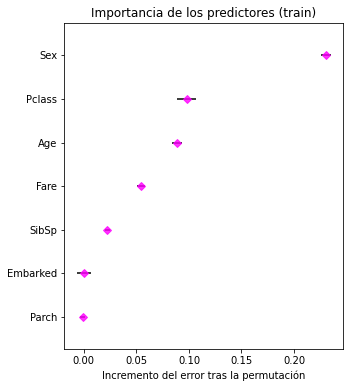

In [57]:
# Gr√°fico
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="magenta"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutaci√≥n');

### Conclusiones generales

Finalmente, y respondiendo a la pregunta base _"¬øQu√© tipo de personas ten√≠an m√°s probabilidades de sobrevivir?"_ podemos afirmar que en gran medida las predicciones de sobrevida estar√°n determinadas por el predictor `Sex`, como pudimos apreciar en un gr√°fico de barras inicial y validarlo por nuestros modelos, ser mujer represent√≥ un gran beneficio a la hora de sobrevivir a la tragedia, tal como se mecion√≥ antes, un estudio interesante ser√≠a sobre las variables que influ√≠an en esto, dada la √©poca que era, quiz√°s termine siendo un estudio m√°s cualitativo, pero podr√≠an realizarse analisis de sentimientos sobre escritos, diarios publicaciones, o cartas de personas de la √©poca, y generar modelos en vase a aquello, con la finalidad de respaldar el hecho de que el _"mujeres y ni√±os primeros"_ respond√≠a a valores o creencias de la √©poca, y as√≠ mismo con otros factores.

Volviendo a lo relevante de nuestros hallazgos, podemos decir que en un segundo lugar estaba la clase a la cual se pertenec√≠a (la clase del ticket o boleto de abordaje), ya que ocupa un segundo lugar como predictor, si nos guiamos por el estudio por permutaci√≥n tanto en el caso de _"Random Forest"_  como en el de _"AdaBoost"_, adem√°s es congruente con lo indicado en nuestro gr√°fico de barras inicial, ser de primera clase daba una gran ventaja por sobre los de la tercera, de hecho sobrevivieron m√°s personas, de las que murieron, en la primera clase.

`Age` es el tercer predictor que podr√≠a decir algo respecto a la supervivencia, aunque aporta en menor medida (hay que tener en cuenta que si la edad del pasajer era baja, igualmente la clase de su pasaje es la que dir√≠a mucho respecto a su supervivencia, m√°s que la edad por s√≠ sola...), en misma instancia se encuentra `Fare`, pero no hay que olvidar que dependiendo del n√∫mero de permutaciones del modelo, se va haciendo cada vez menos relevante esta variable (eso s√≠, nos vendr√≠a bien revisar un boxplot de esta variable, ya que as√≠ pod√≠amos ver que los que sobrevivieron tienen un promedio de precio m√°s alto, lo que coindidir√≠a con lo mencionado respecto a la clase). 

En el caso de los predictores menos influyentes quedaron `Pach` y `Embarked` por lo que, por ejemplo, haber embarcado en cierta ciudad, no nos dar√≠a mucha informaci√≥n sobre si la persona sobrevivi√≥ o no, o de si sobrevivir√≠a a un Titanic virtual, en nuestros modelos, por lo que no vale la pena ahondar mucho en esta informaci√≥n.

Respecto a los modelos como tal, los obtenidos por _"Random Forest"_ (del orden del 82,84% al 84,11% de accuracy aproximadamente) versus a lo obtenido por _"AdaBoost"_ (82.96% 84.30% de accuracy), no presenta mayores diferencias. 

Si comparamos extrictamente peras con peras y manzanas con manzanas, es decir las versiones con _"Grid Seach"_ y _"Cross Validation"_, es _"AdaBoost"_ (AB) quien presenta un mejor modelo por apenas un 0,12% de superaci√≥mejor√≠a versus su s√≠mil obtenido mediante _"Random Forest"_ (RF). Frente a esto el modelo de AB presenta menor √≠ndice de error en sus predicciones, respecto a sus predictores, por lo que es un modelo que entrega mayor seguridad respecto a lo que est√° devolviendo como informaci√≥n. S√≥lo por esto √∫ltimo es que finalmente me inclino a recomendar el modelo por AB.



üìñ
---

**Referencias**

- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Libro.

- Random Forest con Python by Joaqu√≠n Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at [_(Link)_](https://www.cienciadedatos.net/documentos/py08_random_forest_python.html) 

- Random Forest using GridSearchCV, Akshay Nevrekar [_(Link)_](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook)
- Scikit-learn.org/stable/modules/tree

- Scikit-learn.org/stable/modules/ensemble